## Project submission 1
#### Emily Mosquera and Dominique Farfán

### General description of the database, including size, data types, null/blank values, outliers, atypical values.

In [1]:
#Call libraries
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
#Import the dataset
df=pd.read_csv("SEER Breast Cancer Dataset .csv")
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,10,White,Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,16,1,69,Alive
1,30,White,Single (never married),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,28,Positive,Positive,19,7,74,Alive
2,30,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,25,Positive,Positive,15,3,78,Alive
3,31,White,Divorced,NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,42,Positive,Positive,9,3,5,Alive
4,31,Black,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,30,Positive,Positive,16,1,52,Alive


In [3]:
# Let's remove the unnecessary columns using drop()
df.drop(['Unnamed: 3'], axis=1, inplace=True)

In [4]:
#Check the database size
df.shape

(4024, 15)

In [5]:
#Lets check data type 
print(df.dtypes) 

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Regional Node Positive     int64
Survival Months            int64
Status                    object
dtype: object


In [6]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.975398,32.834742,14.357107,4.529324,71.297962
std,9.010704,109.217549,8.099675,18.264337,22.921430
min,10.000000,0.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,102.000000,5400.000000,61.000000,1000.000000,107.000000


### Treat null values

In [7]:
#Check for null values in each column
print(df.isnull().sum())

Age                        0
Race                      13
Marital Status             0
T Stage                    0
N Stage                    0
6th Stage                  0
Grade                      0
A Stage                    0
Tumor Size                 0
Estrogen Status            0
Progesterone Status        0
Regional Node Examined     0
Regional Node Positive     0
Survival Months            0
Status                     0
dtype: int64


Treat null values by eliminating them because there are just 13 in the column 'Race'

In [8]:
df.keys()

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [9]:
df.rename(columns={'Race ':'Race'}, inplace=True)
df.rename(columns={'T Stage ':'T Stage'}, inplace=True)

In [10]:
#Eliminate null values
df = df[df["Race"].notnull()]

### Treat outliers with Winsorization

In [11]:
#Function to detect outliers before Winsorization
def detect_outliers(df):
    Q1 = df.quantile(0.25)  # First quartile (25th percentile)
    Q3 = df.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

In [12]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Get lower and upper bounds
lower_bound, upper_bound = detect_outliers(df[numeric_columns])

# Count outliers before Winsorization
outliers = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

# Print number of outliers per column
print("Outliers before Winsorization:\n", outliers.sum())

Outliers before Winsorization:
 Age                         2
Tumor Size                224
Regional Node Examined     72
Regional Node Positive    346
Survival Months            18
dtype: int64


In [13]:
def winsorize(df, columns):
    df_winsorized = df.copy()  # Copy the original DataFrame
    
    # Select only the specified columns
    selected_cols = df[columns]
    
    # Calculate the IQR bounds
    Q1 = selected_cols.quantile(0.25)
    Q3 = selected_cols.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply Winsorization (clip values within bounds) only to selected columns
    df_winsorized[columns] = selected_cols.clip(lower_bound, upper_bound, axis=1)
    
    return df_winsorized

# Specify the columns you want to Winsorize
columns_to_winsorize = ['Tumor Size', 'Regional Node Positive']

# Apply function
df = winsorize(df, columns_to_winsorize)

In [14]:
#Count outliers after Winsorization
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Get lower and upper bounds
lower_bound, upper_bound = detect_outliers(df[numeric_columns])

# Count outliers after Winsorization
outliers = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

# Print number of outliers per column
print("Outliers after Winsorization:\n", outliers.sum())

Outliers after Winsorization:
 Age                        2
Tumor Size                 0
Regional Node Examined    72
Regional Node Positive     0
Survival Months           18
dtype: int64


In [15]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
count,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000
mean,53.980803,29.371229,14.363750,3.574171,71.278484
std,9.013422,17.795291,8.104004,3.287272,22.939332
min,10.000000,0.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,102.000000,71.000000,61.000000,11.000000,107.000000


In [16]:
df['Tumor Size'].unique()

array([ 9, 28, 25, 42, 30, 65, 71, 10, 45, 19, 55, 40, 35, 50, 15, 68, 11,
       20, 17, 48,  8, 12, 14, 57, 16, 27, 24, 32, 13, 21, 22, 29, 36, 51,
       23, 18,  7, 52, 60, 70, 34,  2, 33, 31, 58, 44, 63, 26,  6, 37, 64,
        3, 53, 38,  5, 59, 61, 39,  0,  4, 43, 41, 54, 62, 46,  1, 69, 47,
       56, 66, 49, 67], dtype=int64)

### Treat outiers in categorical variables

In [17]:
df_cat = df.select_dtypes(include=['object'])
for col in df_cat.columns:
    print(f"Unique values in '{col}':")
    print(df_cat[col].unique())
    print()  # Adding a newline for better readability

Unique values in 'Race':
['White' 'Other (American Indian/AK Native, Asian/Pacific Islander)'
 'Black']

Unique values in 'Marital Status':
['Married (including common law)' 'Single (never married)' 'Divorced'
 'Widowed' 'Separated' 'Split up']

Unique values in 'T Stage':
['T1' 'T2' 'T3' 'T4']

Unique values in 'N Stage':
['N1' 'N2' 'N3']

Unique values in '6th Stage':
['IIA' 'IIIA' 'IIB' 'IIIC' 'IIIB']

Unique values in 'Grade':
['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV'
 'jluky' 'cfjfdit' 'ijkhliuy' 'cfhgdk' 'jjjjj']

Unique values in 'A Stage':
['Regional' 'Distant']

Unique values in 'Estrogen Status':
['Positive' 'Negative']

Unique values in 'Progesterone Status':
['Positive' 'Negative' 'Neutral']

Unique values in 'Status':
['Alive' 'Not dead' 'Dead']



In [18]:
# Define values to remove
values1= ['jluky', 'cfjfdit', 'ijkhliuy', 'cfhgdk', 'jjjjj']
values2= ['Not dead']

# Filter out those values
df = df[~df['Grade'].isin(values1)]
df = df[~df['Status'].isin(values2)]

In [19]:
df['Grade'].unique()

array(['Moderately differentiated; Grade II',
       'Poorly differentiated; Grade III', 'Well differentiated; Grade I',
       'Undifferentiated; anaplastic; Grade IV'], dtype=object)

In [20]:
df['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

### Check correlations

First, it is needed to handle categorical variables: create dummy variables

In [21]:
# Predictive variables
predictors = ['Age', 'Race', 'Marital Status', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months']

# Response variable
outcome = 'Status'

# Get dummies variables from the categorical predictive variables
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]

#Print the result
X

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Split up,Marital Status_Widowed,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Neutral,Progesterone Status_Positive
0,10,9,16,1,69,False,True,True,False,False,False,False,True,True,False,True
1,30,28,19,7,74,False,True,False,False,True,False,False,True,True,False,True
2,30,25,15,3,78,True,False,True,False,False,False,False,True,True,False,True
3,31,42,9,3,5,False,True,False,False,False,False,False,True,True,False,True
4,31,30,16,1,52,False,False,True,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,69,60,21,9,82,False,True,True,False,False,False,False,True,True,False,True
4019,69,71,12,1,83,False,True,False,False,False,False,False,True,True,False,True
4020,69,16,12,6,85,False,True,True,False,False,False,False,True,True,False,True
4021,69,55,13,2,86,False,True,False,False,True,False,False,True,True,False,True


### Categorical variables - ordinal 

In [22]:
# Define the order of the categories 
#(T Stage)
order = ['T1', 'T2', 'T3', 'T4']
#(N Stage)
order1 = ['N1', 'N2', 'N3']
#(6th Stage)
order2 = ['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC']
#(Grade)
order3 = ['Well differentiated; Grade I', 'Moderately differentiated; Grade II', 'Poorly differentiated; Grade III', 'Undifferentiated; anaplastic; Grade IV']

# Apply ordinal coding
df['T Stage'] = df['T Stage'].map({cat: idx for idx, cat in enumerate(order)})
df['N Stage'] = df['N Stage'].map({cat: idx for idx, cat in enumerate(order1)})
df['6th Stage'] = df['6th Stage'].map({cat: idx for idx, cat in enumerate(order2)})
df['Grade'] = df['Grade'].map({cat: idx for idx, cat in enumerate(order3)})

# Print dataframe
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,10,White,Married (including common law),0,0,0,1,Regional,9,Positive,Positive,16,1,69,Alive
1,30,White,Single (never married),1,1,2,1,Regional,28,Positive,Positive,19,7,74,Alive
2,30,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),1,0,1,1,Regional,25,Positive,Positive,15,3,78,Alive
3,31,White,Divorced,1,0,1,1,Regional,42,Positive,Positive,9,3,5,Alive
4,31,Black,Married (including common law),1,0,1,2,Regional,30,Positive,Positive,16,1,52,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,69,White,Married (including common law),2,0,2,2,Regional,60,Positive,Positive,21,9,82,Dead
4019,69,White,Divorced,2,0,2,1,Regional,71,Positive,Positive,12,1,83,Dead
4020,69,White,Married (including common law),0,1,2,2,Regional,16,Positive,Positive,12,6,85,Dead
4021,69,White,Single (never married),2,0,2,1,Regional,55,Positive,Positive,13,2,86,Dead


In [23]:
df_final = pd.concat([X, df[['T Stage', 'N Stage', '6th Stage', 'Grade']]], axis=1)

# Show the data frame
df_final.head()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Split up,Marital Status_Widowed,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Neutral,Progesterone Status_Positive,T Stage,N Stage,6th Stage,Grade
0,10,9,16,1,69,False,True,True,False,False,False,False,True,True,False,True,0,0,0,1
1,30,28,19,7,74,False,True,False,False,True,False,False,True,True,False,True,1,1,2,1
2,30,25,15,3,78,True,False,True,False,False,False,False,True,True,False,True,1,0,1,1
3,31,42,9,3,5,False,True,False,False,False,False,False,True,True,False,True,1,0,1,1
4,31,30,16,1,52,False,False,True,False,False,False,False,True,True,False,True,1,0,1,2


In [24]:
df_final.dtypes

Age                                                               int64
Tumor Size                                                        int64
Regional Node Examined                                            int64
Regional Node Positive                                            int64
Survival Months                                                   int64
Race_Other (American Indian/AK Native, Asian/Pacific Islander)     bool
Race_White                                                         bool
Marital Status_Married (including common law)                      bool
Marital Status_Separated                                           bool
Marital Status_Single (never married)                              bool
Marital Status_Split up                                            bool
Marital Status_Widowed                                             bool
A Stage_Regional                                                   bool
Estrogen Status_Positive                                        

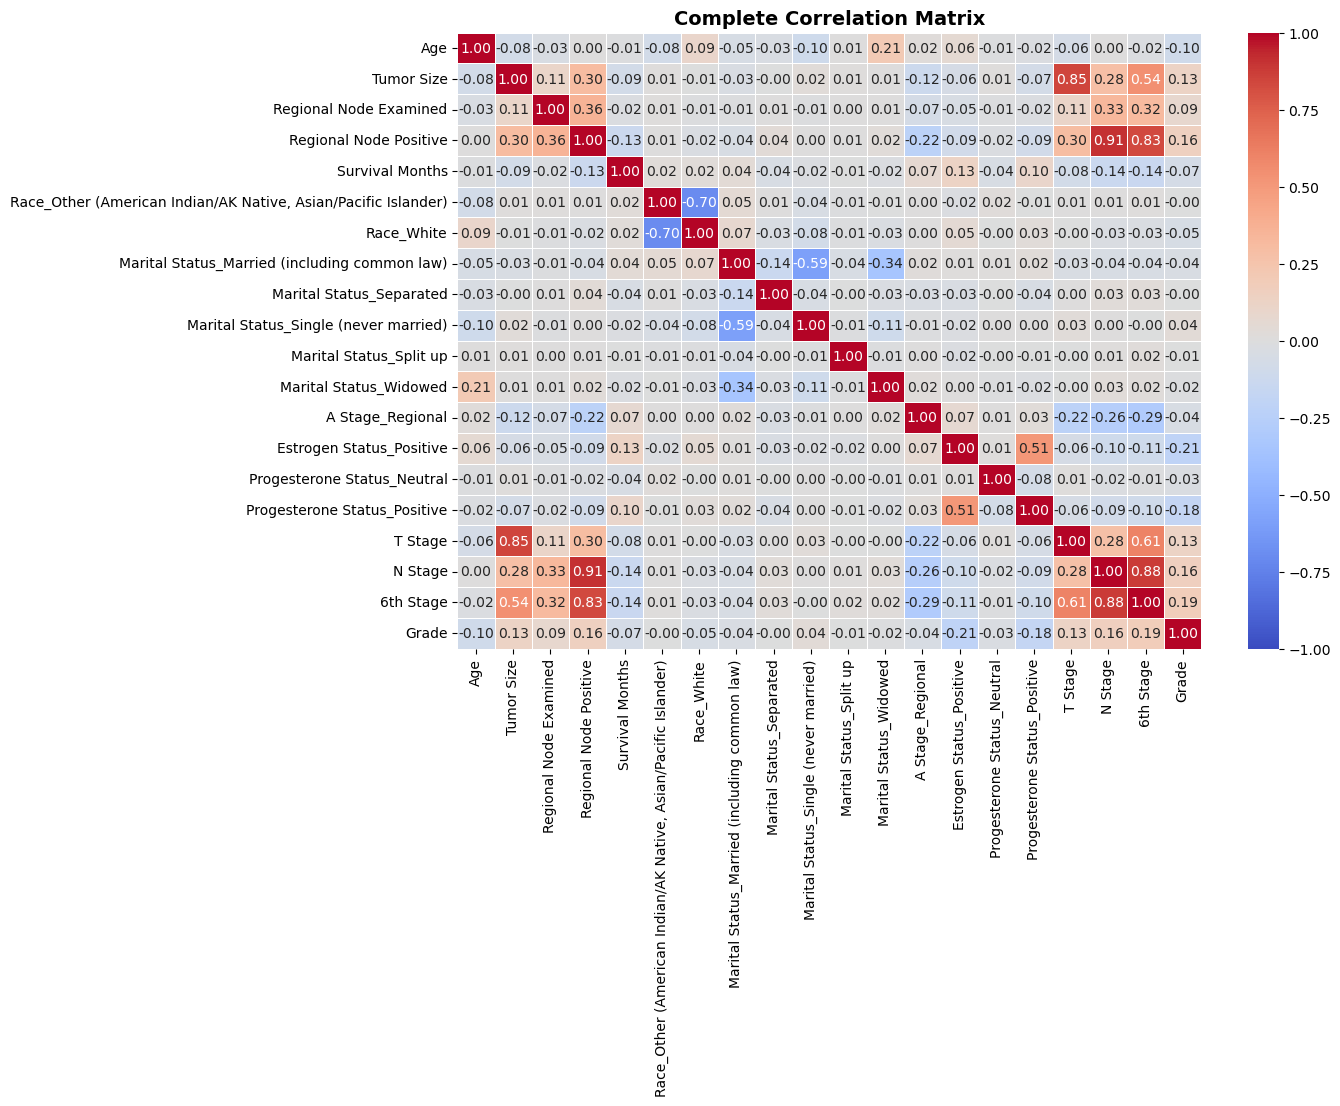

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df_final.corr()

# Graph configuration
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    cmap="coolwarm",  # For visualizing better positive/negative
    linewidths=0.5, 
    annot=True,  # Show values
    fmt=".2f",  # Round to 2 decimals
    cbar=True,  # Show color bar
    vmin=-1, vmax=1,  # Range of correlation
)

# Title
plt.title("Complete Correlation Matrix", fontsize=14, fontweight="bold")

# Show image
plt.show()


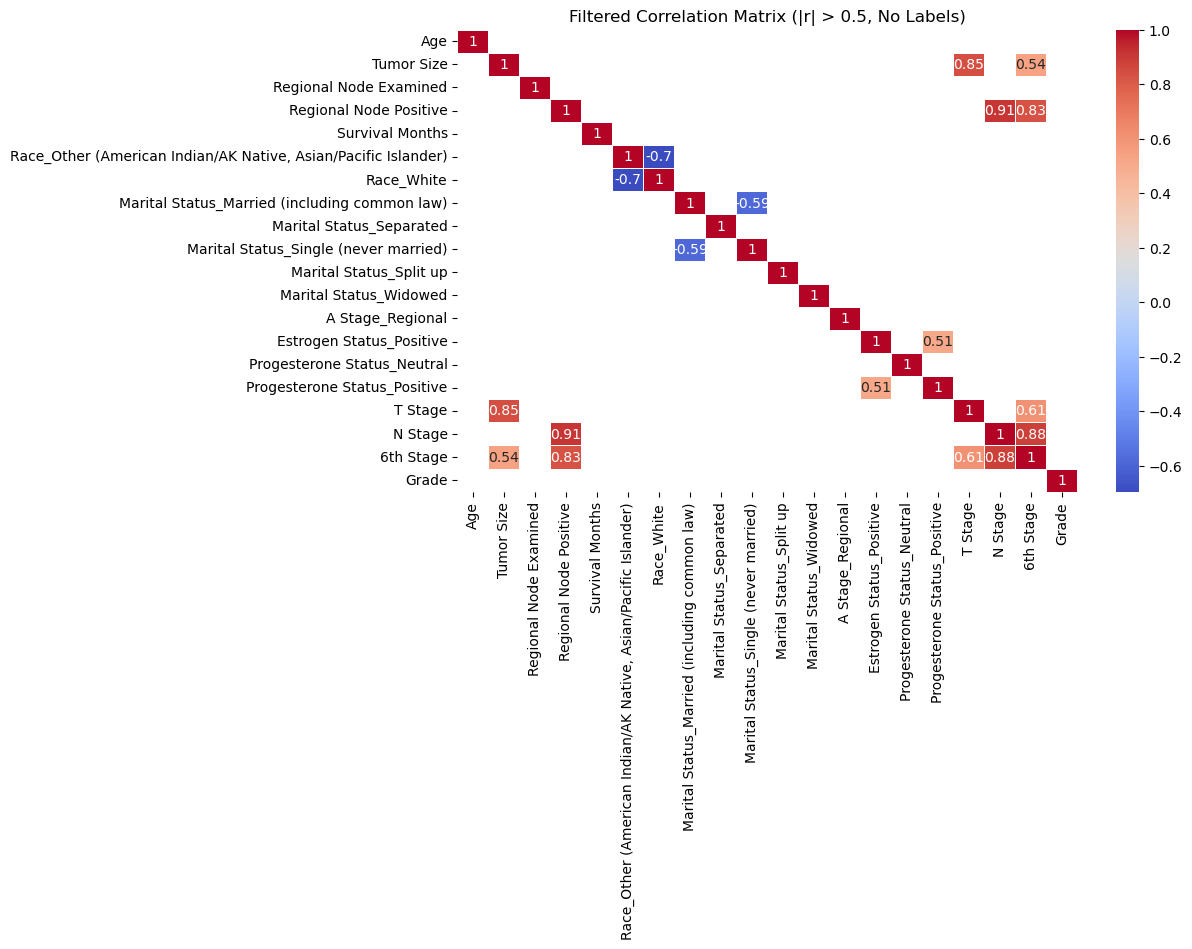

In [26]:
# Show only the most important correlation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_final.corr()

# Set threshold for strong correlations
threshold = 0.5

# Create a mask to hide weak correlations
mask = (corr_matrix < threshold) & (corr_matrix > -threshold)

# Plot heatmap with mask and without labels
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, mask=mask, annot=True, cbar=True)

# Add title
plt.title("Filtered Correlation Matrix (|r| > 0.5, No Labels)")

plt.show()


In [27]:
import pandas as pd
import numpy as np

# Compute correlation matrix
corr_matrix = df_final.corr()

# Set threshold for strong correlations
threshold = 0.5

# Create a mask for the upper triangle (excluding diagonal)
mask = np.triu(np.ones(corr_matrix.shape), k=0).astype(bool)

# Apply the mask to get only the upper triangle
filtered_corr = corr_matrix.where((corr_matrix > threshold) | (corr_matrix < -threshold))  # Keep only strong correlations
filtered_corr = filtered_corr.where(~mask)  # Remove duplicates and diagonal

# Drop empty rows/columns
filtered_corr = filtered_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)

# Print the cleaned correlation table
print("Strong Correlations (|r| > 0.5):")
print(filtered_corr.round(2))  # Round to 2 decimal places


Strong Correlations (|r| > 0.5):
                                       Tumor Size  Regional Node Positive  \
Race_White                                    NaN                     NaN   
Marital Status_Single (never married)         NaN                     NaN   
Progesterone Status_Positive                  NaN                     NaN   
T Stage                                      0.85                     NaN   
N Stage                                       NaN                    0.91   
6th Stage                                    0.54                    0.83   

                                       Race_Other (American Indian/AK Native, Asian/Pacific Islander)  \
Race_White                                                                          -0.7                
Marital Status_Single (never married)                                                NaN                
Progesterone Status_Positive                                                         NaN                
T Stage

### Data visualization

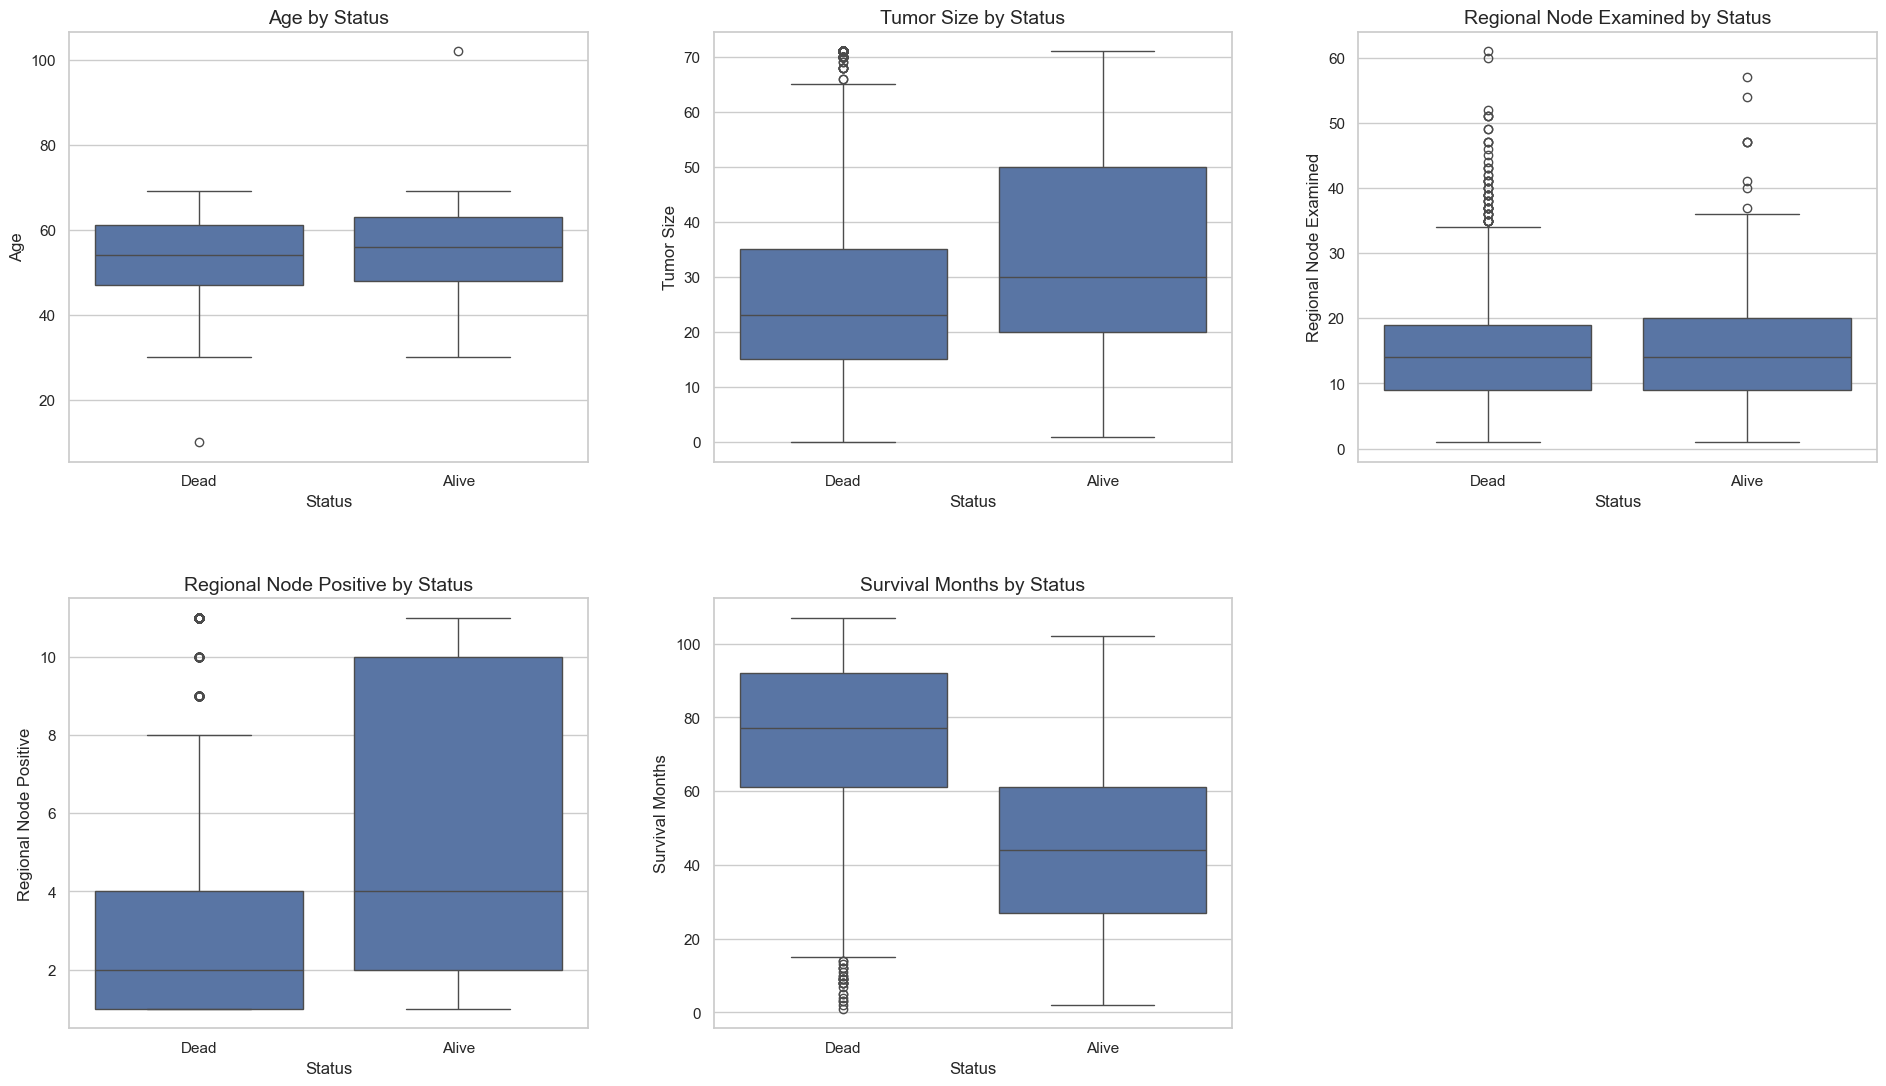

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set visual style
sns.set(style="whitegrid")

# Define numerical columns and response variable
numeric_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # 2 rows, 3 columns for layout

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for each numeric variable
for i, col in enumerate(numeric_cols):
    sns.boxplot(x="Status", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} by Status", fontsize=14)
    axes[i].set_xlabel("Status", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Dead', 'Alive'], fontsize=11)

# Remove unused subplot (last one, if any)
if len(numeric_cols) < len(axes):
    for j in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout(pad=4.0)

# Show the plot
plt.show()

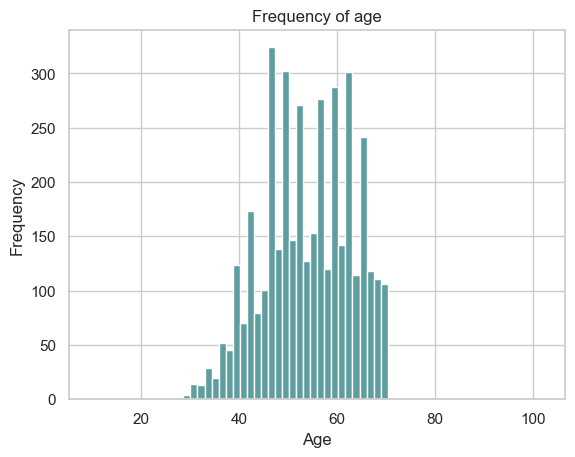

In [29]:
plt.hist(x= df['Age'], bins="sqrt", color="#5F9EA0") #it creates the ranges and the values
plt.title ("Frequency of age")
plt.xlabel ("Age")
plt.ylabel ("Frequency")
  # Adjust the range and step as needed
plt.show ()


C:\Users\emiam\AppData\Local\Temp\ipykernel_10128\3579969739.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, rotation=30, ha='right')


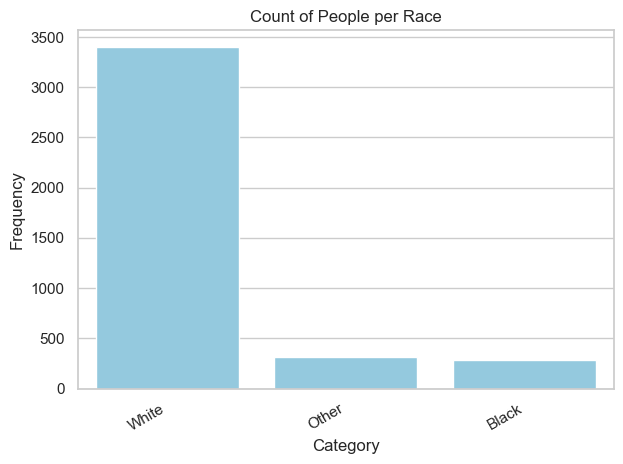

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create graphic
ax = sns.countplot(data=df, x='Race', color='skyblue')

# Obtain original labels
original_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Replace label for 'Other' if the original includes the string 'Other'
new_labels = ['Other' if 'Other' in label else label for label in original_labels]

# Assign new labels
ax.set_xticklabels(new_labels, rotation=30, ha='right')

# Add titles and labels
plt.title('Count of People per Race')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Show graph
plt.tight_layout()
plt.show()


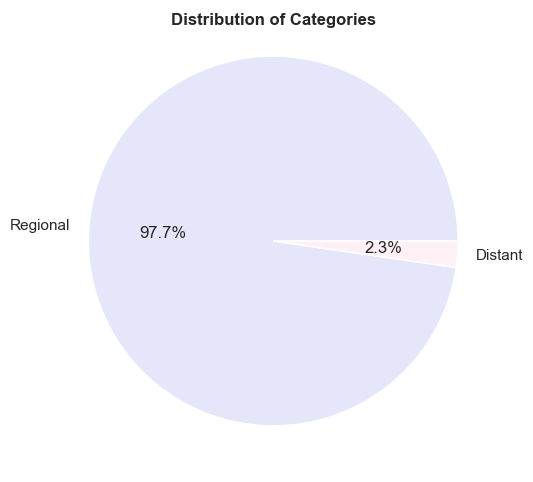

In [31]:
# Count the occurrences of each category in T Stage
category_counts = df['A Stage'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Optional: adjust figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lavender', 'lavenderblush'])

# Customize the plot
plt.title('Distribution of Categories', y = 0.95, fontweight='bold')

# Show the plot
plt.show()

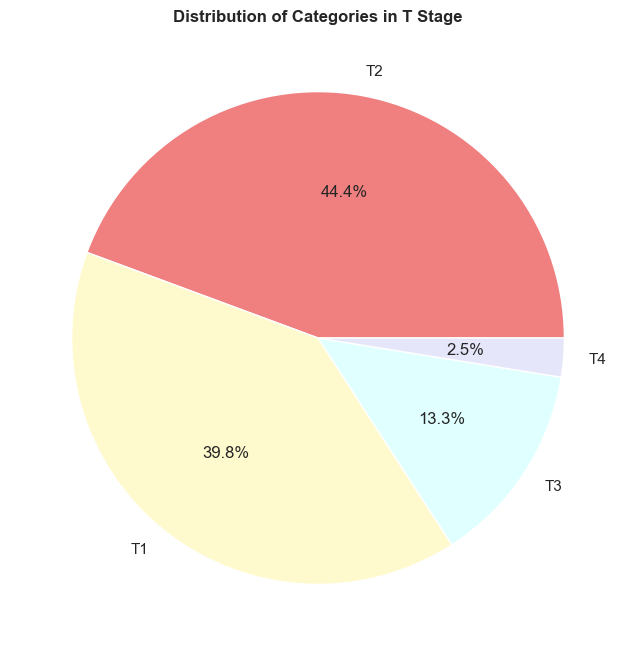

In [32]:
# Map of coding of the variable ‘Grade’
grade_mapping = {
    0: 'T1',
    1: 'T2',
    2: 'T3',
    3: 'T4'
}

# Count the occurrences of each category in T Stage
category_counts = df['T Stage'].value_counts()
present_keys = category_counts.index.tolist()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(category_counts, labels=[grade_mapping[i] for i in present_keys], autopct='%1.1f%%', colors=['lightcoral', 'lemonchiffon', 'lightcyan', 'lavender'])

# Customize the plot
plt.title('Distribution of Categories in T Stage',y = 1, fontweight='bold')

# Show the plot
plt.show()


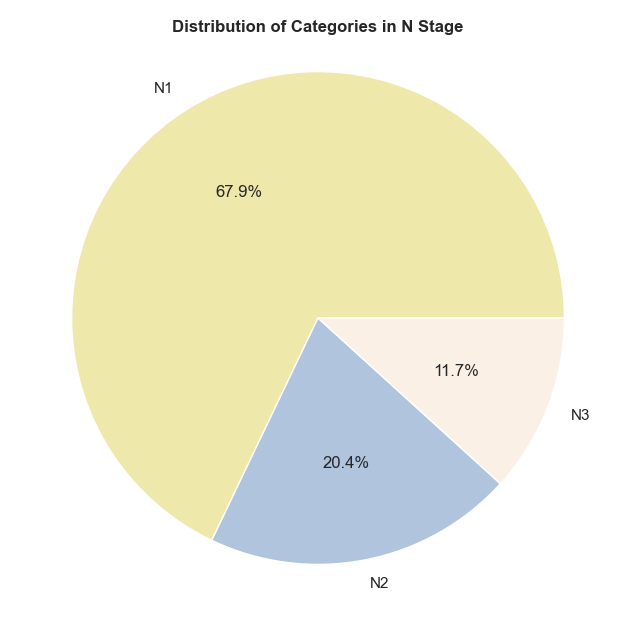

In [33]:
# Map of coding of the variable ‘Grade’
grade_mapping = {
    0: 'N1',
    1: 'N2',
    2: 'N3'
}

# Count the occurrences of each category in N Stage
category_counts = df['N Stage'].value_counts()
present_keys = category_counts.index.tolist()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(category_counts, labels=[grade_mapping[i] for i in present_keys], autopct='%1.1f%%', colors=['palegoldenrod', 'lightsteelblue', 'linen'])  

# Customize the plot
plt.title('Distribution of Categories in N Stage', y = 0.95, fontweight='bold')

# Show the plot
plt.show()

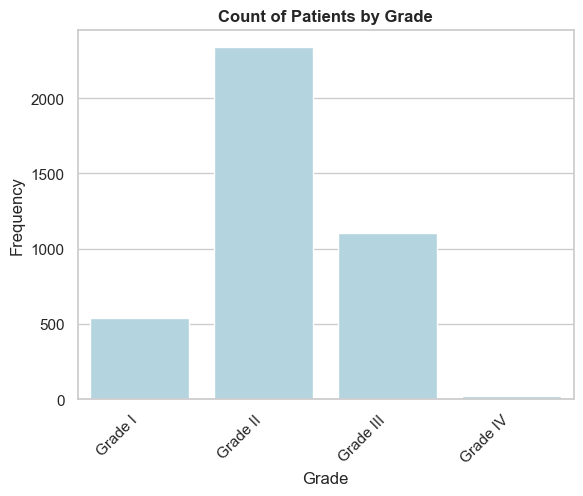

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map of coding of the variable ‘Grade’
grade_mapping = {
    0: 'Grade I',
    1: 'Grade II',
    2: 'Grade III',
    3: 'Grade IV'
}

# Create a bar chart of the Grade
sns.countplot(data=df, x='Grade', color='lightblue')

# # Modify the x-axis labels to show the meanings
plt.xticks(ticks=range(4), labels=[grade_mapping[i] for i in range(4)], rotation=45, ha='right')

# Customize the plot
plt.title('Count of Patients by Grade', y = 1, fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Frequency')

# Show the plot
plt.show()


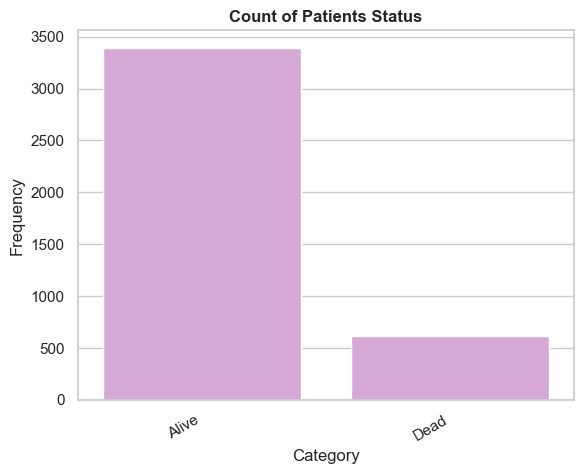

In [35]:
# Create a count plot for the response variable
sns.countplot(data=df, x='Status', color='plum')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30, ha='right')  # Adjust the angle (e.g., 45 degrees)

# Customize the plot
plt.title('Count of Patients Status',  y = 1, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Show the plot
plt.show()

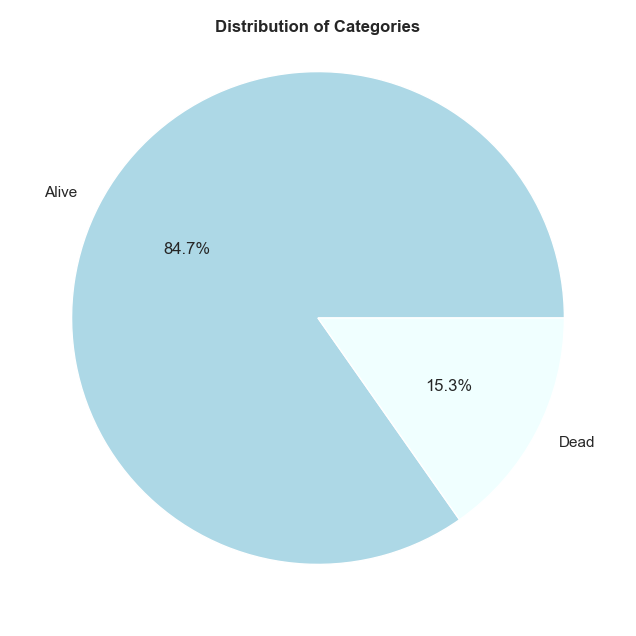

In [36]:
# Count the occurrences of each category in N Stage
category_counts = df['Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lightblue', 'azure'])  

# Customize the plot
plt.title('Distribution of Categories',y = 0.95, fontweight='bold')

# Show the plot
plt.show()

# Divide the data set in training, validation, and test set.

In [37]:
# Select the predictive and response variable
X = df_final
y = df['Status']  # Corrected the column name 'Status'

# Split the dataset into training (60%), testing (20%) and validation (20%) sets
# First, split into training (50%) and temporary (50%) sets
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.4, random_state = 42, stratify = y)

# Then, split the temporary set into validation (50%) and test (50%) sets (20% of total for validation, 20% for test)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state = 42, stratify= temp_y)

# Check the partition of the data is correct
print('Training data 60%:', train_X.shape, train_y.shape)
print('Validation data 20%:', valid_X.shape, valid_y.shape)
print('Test data 20%:', test_X.shape, test_y.shape)

Training data 60%: (2402, 20) (2402,)
Validation data 20%: (801, 20) (801,)
Test data 20%: (801, 20) (801,)


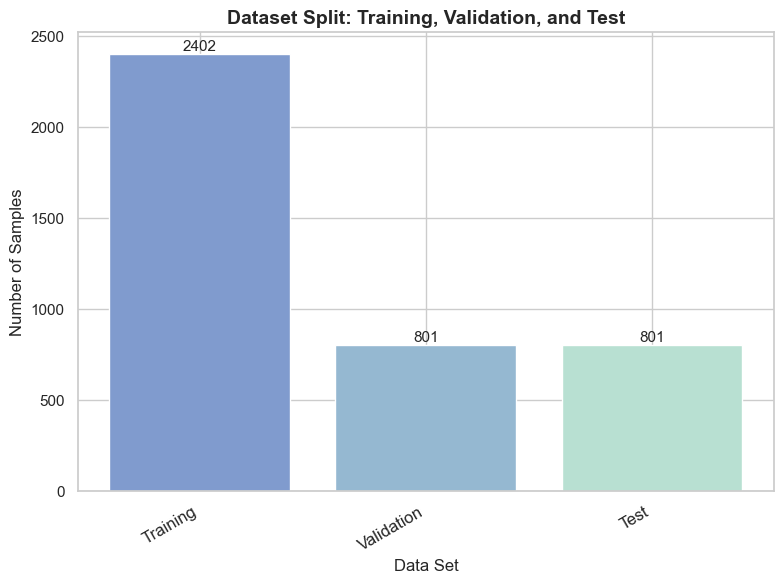

In [38]:
# Set sizes
train_size = train_X.shape[0]
valid_size = valid_X.shape[0]
test_size = test_X.shape[0]

# Name for each set
data_labels = ['Training', 'Validation', 'Test']
data_sizes = [train_size, valid_size, test_size]

# Create a bar chart of Dataset Split
plt.figure(figsize=(8, 6))
plt.xticks(rotation=30, ha='right', fontsize = 12)  
bars = plt.bar(data_labels, data_sizes, color=['#809bce', '#95b8d1', '#b8e0d2'])

# Add the values above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, str(height),
             ha='center', va='bottom', fontsize=11)

# Customize the plot
plt.title('Dataset Split: Training, Validation, and Test', y = 1, fontweight='bold', fontsize = 14)
plt.xlabel('Data Set')
plt.ylabel('Number of Samples')
plt.tight_layout()

# Show the plot
plt.show()

# Unbalanced data
### Apply just to training set

###  SMOTE
Method to perform over-sampling

The code was extracted from:

SMOTE — Version 0.13.0. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [39]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Verify the original distribution
print('Original training distribution:', Counter(train_y))

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(train_X, train_y)

# Verify the new distribution
print('Balanced distribution:', Counter(y_res))

Original training distribution: Counter({'Alive': 2035, 'Dead': 367})
Balanced distribution: Counter({'Alive': 2035, 'Dead': 2035})


###  RUS
Under-sample the majority class(es) by randomly picking samples with or without replacement.

The code was extracted from:

RandomUnderSampler — Version 0.13.0. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

In [40]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# # Verify the original distribution
print('Original distribution:', Counter(train_y))

# Apply RUS
rus = RandomUnderSampler(random_state=42)
X_res1, y_res1 = rus.fit_resample(train_X, train_y)

# Verify the new distribution
print('Balanced distribution:', Counter(y_res1))

Original distribution: Counter({'Alive': 2035, 'Dead': 367})
Balanced distribution: Counter({'Alive': 367, 'Dead': 367})


# Machine learning

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold
import numpy as np

# Setup for repeated K-Fold Cross-Validation (10 splits, repeated 3 times)
kf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# Initialize the logistic regression model
logit_model = LogisticRegression(penalty=None, solver='newton-cg', max_iter=1000)

# Dictionary to store accuracy scores for each sampling method
accuracy_results = {}

# Evaluation with SMOTE
print('SMOTE Logistic Regression with 10-Fold CV')
scores_smote = cross_val_score(logit_model, X_res, y_res, cv=kf, scoring='accuracy')
accuracy_results['SMOTE'] = scores_smote  # Save fold scores to the dictionary
print('Accuracy per fold (SMOTE):', np.round(scores_smote, 4))
print('Average accuracy (SMOTE):', round(scores_smote.mean(), 4))

# Evaluation with RUS
print('RUS Logistic Regression with 10-Fold CV')
scores_rus = cross_val_score(logit_model, X_res1, y_res1, cv=kf, scoring='accuracy')
accuracy_results['RUS'] = scores_rus  # Save fold scores to the dictionary
print('Accuracy per fold (RUS):', np.round(scores_rus, 4))
print('Average accuracy (RUS):', round(scores_rus.mean(), 4))

SMOTE Logistic Regression with 10-Fold CV
Accuracy per fold (SMOTE): [0.8329 0.8501 0.8133 0.8428 0.8698 0.8256 0.8501 0.8329 0.86   0.8845
 0.86   0.8501 0.8354 0.8477 0.855  0.801  0.8329 0.8993 0.8231 0.8501
 0.8501 0.8649 0.828  0.8649 0.8378 0.8354 0.8501 0.8206 0.86   0.8575]
Average accuracy (SMOTE): 0.8462
RUS Logistic Regression with 10-Fold CV
Accuracy per fold (RUS): [0.8108 0.7297 0.8108 0.8243 0.7808 0.7945 0.8082 0.7123 0.7397 0.7945
 0.7838 0.7973 0.8378 0.7973 0.8082 0.7808 0.7534 0.7671 0.7123 0.7534
 0.8243 0.7297 0.8378 0.8378 0.7123 0.7945 0.6986 0.6986 0.8493 0.8904]
Average accuracy (RUS): 0.7824


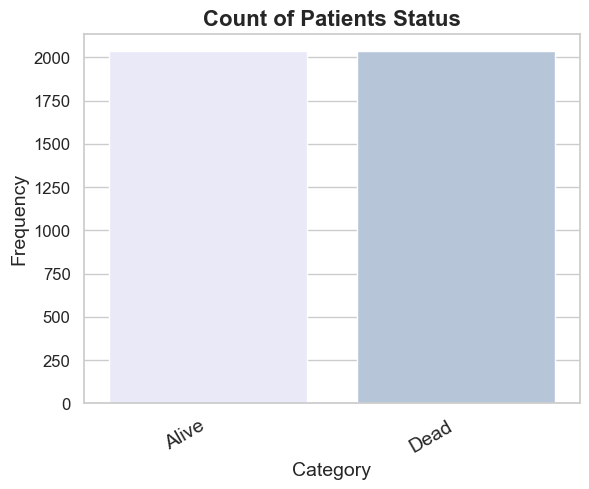

In [53]:
# Convert y_res to a DataFrame with a 'Status' column
y_df = pd.DataFrame(y_res, columns=['Status'])

# Create a count plot with custom colors, using hue and disabling legend
sns.countplot(data=y_df, x='Status', hue='Status', palette=['lavender', 'lightsteelblue'], legend=False)

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=30, ha='right', fontsize=14)
plt.yticks(fontsize=12)

# Customize the plot with larger fonts
plt.title('Count of Patients Status', y=1, fontweight='bold', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

## Statistical analysis
**Null Hypothesis (H₀):** There is no significant difference between the means.

Ho: $\mu_S = \mu_R$

**Alternative Hypothesis (H₁):** There is a significant difference between the means.

Ha: $\mu_S \neq \mu_R$

In [42]:
from scipy.stats import t, ttest_rel
import numpy as np

# Paired t-test setup
alpha = 0.05
mu = 0  # Hypothesized mean difference

# Convert accuracy to percentages (optional)
data1 = accuracy_results['SMOTE'] * 100
data2 = accuracy_results['RUS'] * 100

# Compute differences
dif = data1 - data2
db = np.mean(dif)               # Mean difference
s = np.std(dif, ddof=1)         # Standard deviation of differences
n = len(dif)
gl = n - 1                      # Degrees of freedom

# Two-tailed critical t value
t_crit = t.ppf(1 - alpha/2, gl)

# Obtained t-statistic
t_obt = (db - mu) / (s / np.sqrt(n))

# Compute two-tailed p-value manually
p_value = 2 * (1 - t.cdf(abs(t_obt), df=gl))

# Alternatively, using scipy's built-in paired t-test:
# t_obt, p_value = ttest_rel(data1, data2)

# Print results
print('Paired t-test results')
print('Mean difference =', round(db, 4))
print('Critical t =', round(t_crit, 4))
print('Obtained t =', round(t_obt, 4))
print('p-value =', round(p_value, 10))

if p_value < alpha:
    print("Reject H₀: There is a significant difference.")
else:
    print("Do not reject H₀: No significant difference.")


Paired t-test results
Mean difference = 6.3827
t crítico = 2.0452
t obtenido = 6.8207
p-value = 1.724e-07
Reject H₀: There is a significant difference.


In [43]:
#Print the average to chose the best
print('Average accuracy (SMOTE):', round(scores_smote.mean(), 4))
print('Average accuracy (RUS):', round(scores_rus.mean(), 4))

Average accuracy (SMOTE): 0.8462
Average accuracy (RUS): 0.7824


### Random Forests Algorithm

In [44]:
# Import specific libraries for the algorithm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
# Train the random forest model as classifier
rf_model = RandomForestClassifier(
    n_estimators=100,         # Number of trees (more = better but slower)
    max_depth=None,           # Max depth of each tree (None = expand until pure)
    min_samples_split=2,      # Min samples to split an internal node
    min_samples_leaf=1,       # Min samples required at a leaf node
    max_features='sqrt',      # Features considered at each split ('sqrt' is good for classification)
    bootstrap=True,           # Use bootstrap sampling (default = True)
    random_state=42           # For reproducibility
)
#n=number of trees in the forest. random=Controls both the randomness of the bootstrapping and sampling of features
rf_model.fit(X_res, y_res) #include the variables that have been processed with SMOTE and t-pared test

RandomForestClassifier(random_state=42)

In [46]:
# Obtain the predictions with test set
y_pred = rf_model.predict(test_X)

# Compare with actual values
comparison = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
print("\nComparison of actual and predicted values:")
print(comparison.head(10))


Comparison of actual and predicted values:
     Actual Predicted
692   Alive     Alive
2954  Alive     Alive
1367  Alive     Alive
1672  Alive     Alive
1025  Alive     Alive
90    Alive     Alive
1224  Alive     Alive
3574   Dead     Alive
2060  Alive     Alive
1332  Alive     Alive


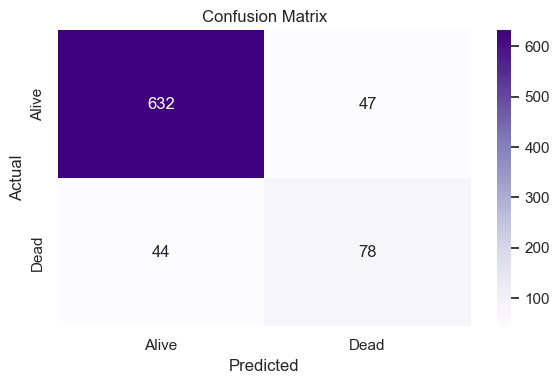


Classification Report:
              precision    recall  f1-score   support

       Alive       0.93      0.93      0.93       679
        Dead       0.62      0.64      0.63       122

    accuracy                           0.89       801
   macro avg       0.78      0.79      0.78       801
weighted avg       0.89      0.89      0.89       801


Accuracy Score: 0.8863920099875156


In [47]:
# Create the confusion matrix
cm = confusion_matrix(test_y, y_pred)
labels = rf_model.classes_  # This gets ['Alive', 'Dead'] if those are your labels

# Plot with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(test_y, y_pred))

print("\nAccuracy Score:", accuracy_score(test_y, y_pred))

In [48]:
comparison.head(20)

,Actual,Predicted
692,Alive,Alive
2954,Alive,Alive
1367,Alive,Alive
1672,Alive,Alive
1025,Alive,Alive
90,Alive,Alive
1224,Alive,Alive
3574,Dead,Alive
2060,Alive,Alive
1332,Alive,Alive


### Gradient boosting classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(
    n_estimators=100,      # Number of boosting stages (trees)
    learning_rate=0.1,     # Step size (higher values = faster learning, but risk of overfitting)
    max_depth=3,           # Depth of each tree (1 = very shallow trees, called decision stumps)
    random_state=0
).fit(X_res, y_res)        # X_res and y_res are training features and labels


accuracy = clf.score(test_X, test_y)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8677


In [50]:
# Obtain the predictions with test set
y_pred2 = clf.predict(test_X)

# Compare with actual values
comparison2 = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred2})
print("\nComparison of actual and predicted values:")
print(comparison2.head(10))


Comparison of actual and predicted values:
     Actual Predicted
692   Alive     Alive
2954  Alive     Alive
1367  Alive     Alive
1672  Alive     Alive
1025  Alive     Alive
90    Alive     Alive
1224  Alive     Alive
3574   Dead     Alive
2060  Alive     Alive
1332  Alive     Alive


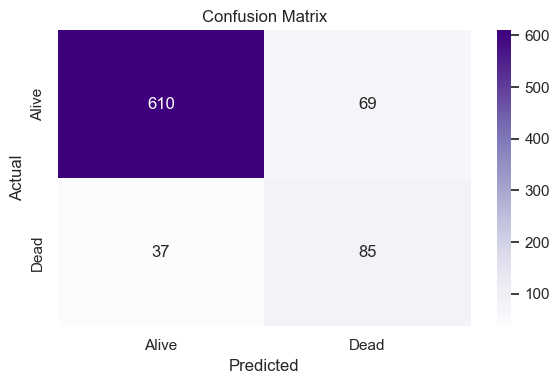


Classification Report:
              precision    recall  f1-score   support

       Alive       0.94      0.90      0.92       679
        Dead       0.55      0.70      0.62       122

    accuracy                           0.87       801
   macro avg       0.75      0.80      0.77       801
weighted avg       0.88      0.87      0.87       801


Accuracy Score: 0.867665418227216


In [51]:
# Create the confusion matrix
cm = confusion_matrix(test_y, y_pred2)
labels = clf.classes_  # This gets ['Alive', 'Dead'] 

# Plot with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(test_y, y_pred2))

print("\nAccuracy Score:", accuracy_score(test_y, y_pred2))

In [52]:
comparison2.head(20)

,Actual,Predicted
692,Alive,Alive
2954,Alive,Alive
1367,Alive,Alive
1672,Alive,Alive
1025,Alive,Alive
90,Alive,Alive
1224,Alive,Alive
3574,Dead,Alive
2060,Alive,Alive
1332,Alive,Alive


### References
- RandomUnderSampler — Version 0.13.0. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html SMOTE — Version 0.13.0. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
- GradientBoostingClassifier. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- RandomForestClassifier. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- 3.1. Cross-validation: evaluating estimator performance. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/cross_validation.html